In [5]:
import pandas as pd

# Load the datasets
pre_assessment_data = pd.read_csv("../data/Med student pre assessment 2.8.23.csv")
foundational_post = pd.read_csv("../data/Foundational Post Assessment 2.8.23.csv")
intermediate_post = pd.read_csv("../data/intermediate post assessment 2.8.23.csv")
post_assessment_data = pd.read_csv("../data/Advanced post assessment 2.8.23.csv")
post_assessment_2022 = pd.read_csv("../data/IDD-MH Med Student Advanced Post Assessment_October 10, 2022_14.41.csv")

In [6]:
# Identifying the relevant columns for analysis
score_column = 'SC0'
year_in_training_column = 'Q1'
response_id_column = 'ResponseId'

# Filtering out the non-numeric rows in score columns (like headers or metadata)
pre_assessment_data_filtered = pre_assessment_data[pd.to_numeric(pre_assessment_data[score_column], errors='coerce').notnull()]
post_assessment_data_filtered = post_assessment_data[pd.to_numeric(post_assessment_data[score_column], errors='coerce').notnull()]

# Converting score columns to numeric for analysis
pre_assessment_data_filtered[score_column] = pd.to_numeric(pre_assessment_data_filtered[score_column])
post_assessment_data_filtered[score_column] = pd.to_numeric(post_assessment_data_filtered[score_column])

# Merging the pre and post datasets based on ResponseId to analyze score improvements
merged_data = pre_assessment_data_filtered[[response_id_column, year_in_training_column, score_column]].merge(
    post_assessment_data_filtered[[response_id_column, score_column]],
    on=response_id_column,
    suffixes=('_pre', '_post')
)

# Computing score improvement
merged_data['score_improvement'] = merged_data[f'{score_column}_post'] - merged_data[f'{score_column}_pre']

# Displaying the first few rows of the merged dataset for an overview
merged_data_head = merged_data.head()
merged_data_head

/var/folders/yq/ssgkp1wn2tbb4cflr_7nnmtr0000gn/T/ipykernel_2689/4022701449.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_assessment_data_filtered[score_column] = pd.to_numeric(pre_assessment_data_filtered[score_column])
/var/folders/yq/ssgkp1wn2tbb4cflr_7nnmtr0000gn/T/ipykernel_2689/4022701449.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_assessment_data_filtered[score_column] = pd.to_numeric(post_assessment_data_filtered[score_column])


,ResponseId,Q1,SC0_pre,SC0_post,score_improvement


In [22]:
# Inspecting the first few ResponseId values from both datasets to check for formatting inconsistencies
pre_response_ids_head = pre_assessment_data[response_id_column].head(10)
post_response_ids_head = post_assessment_data[response_id_column].head(10)

(pre_response_ids_head, post_response_ids_head)


(0                 Response ID
 1    {"ImportId":"_recordId"}
 2           R_djvqzijTB5L2Pjb
 3           R_2zqcz6JEOzFKMf0
 4           R_12SvBoipzeVQw2d
 5           R_2SH7E5DZhOsRjZh
 6           R_3PhIpFxHA8Ho4s8
 7           R_210zyA6WedvYKdT
 8           R_XHBBSTCim34VOtb
 9           R_es03L5DQE4kCMO5
 Name: ResponseId, dtype: object,
 0                 Response ID
 1    {"ImportId":"_recordId"}
 2           R_31XbBuf7cpN9G8J
 3           R_2D5lalLKtLsTWkZ
 4           R_3D1hs06lyOhFtsk
 5           R_32637n9t6RuswHP
 6           R_3PLUU1EpPQfrJiy
 7           R_21jIwrn4fEuch5D
 8           R_24hK5CMUoA9UGkW
 9           R_3PlncF0ASG7vtq9
 Name: ResponseId, dtype: object)

In [7]:
# Filtering out header and metadata rows from both datasets
pre_assessment_data_cleaned = pre_assessment_data[2:]
post_assessment_data_cleaned = post_assessment_data[2:]

# Merging the cleaned pre and post datasets based on ResponseId
merged_data_cleaned = pre_assessment_data_cleaned[[response_id_column, year_in_training_column, score_column]].merge(
    post_assessment_data_cleaned[[response_id_column, score_column]],
    on=response_id_column,
    suffixes=('_pre', '_post')
)

# Converting score columns to numeric for analysis
merged_data_cleaned[score_column + '_pre'] = pd.to_numeric(merged_data_cleaned[score_column + '_pre'], errors='coerce')
merged_data_cleaned[score_column + '_post'] = pd.to_numeric(merged_data_cleaned[score_column + '_post'], errors='coerce')

# Dropping NaN values in score columns
merged_data_cleaned = merged_data_cleaned.dropna(subset=[score_column + '_pre', score_column + '_post'])

# Computing score improvement
merged_data_cleaned['score_improvement'] = merged_data_cleaned[score_column + '_post'] - merged_data_cleaned[score_column + '_pre']

# Displaying the first few rows of the merged dataset for an overview
merged_data_cleaned_head = merged_data_cleaned.head()
merged_data_cleaned_head


,ResponseId,Q1,SC0_pre,SC0_post,score_improvement


In [8]:
# Checking for any overlapping ResponseId values between the two datasets
overlap_response_ids = set(pre_assessment_data_cleaned[response_id_column]).intersection(post_assessment_data_cleaned[response_id_column])

# Number of overlapping ResponseId values
num_overlap = len(overlap_response_ids)
num_overlap


0

In [9]:
# Inspecting the column names of both datasets to identify any potential consistent identifiers
pre_columns = pre_assessment_data_cleaned.columns
post_columns = post_assessment_data_cleaned.columns

# Identifying common columns between the two datasets
common_columns = set(pre_columns).intersection(post_columns)
common_columns

{'DistributionChannel',
 'Duration (in seconds)',
 'EndDate',
 'ExternalReference',
 'Finished',
 'IPAddress',
 'LocationLatitude',
 'LocationLongitude',
 'Progress',
 'Q30',
 'Q31',
 'Q36',
 'Q37',
 'Q52',
 'RecipientEmail',
 'RecipientFirstName',
 'RecipientLastName',
 'RecordedDate',
 'ResponseId',
 'SC0',
 'StartDate',
 'Status',
 'UserLanguage'}

In [10]:
# Checking the uniqueness of the IPAddress column in both datasets to evaluate its suitability for merging
unique_ips_pre = pre_assessment_data_cleaned['IPAddress'].nunique()
unique_ips_post = post_assessment_data_cleaned['IPAddress'].nunique()

total_rows_pre = pre_assessment_data_cleaned.shape[0]
total_rows_post = post_assessment_data_cleaned.shape[0]

# Percentage of unique IP Addresses in each dataset
percentage_unique_ips_pre = (unique_ips_pre / total_rows_pre) * 100
percentage_unique_ips_post = (unique_ips_post / total_rows_post) * 100

(unique_ips_pre, total_rows_pre, percentage_unique_ips_pre, unique_ips_post, total_rows_post, percentage_unique_ips_post)


(67, 100, 67.0, 22, 29, 75.86206896551724)

In [11]:
# Performing a left join on IP address to see how many are common between pre and post datasets
merged_on_ip = pre_assessment_data_cleaned.merge(post_assessment_data_cleaned, on='IPAddress', how='left', suffixes=('_pre', '_post'))

# Counting the number of non-null entries in the post-assessment dataset after the merge
non_null_post_entries = merged_on_ip['SC0_post'].notnull().sum()

non_null_post_entries, merged_on_ip.shape[0]


(45, 116)

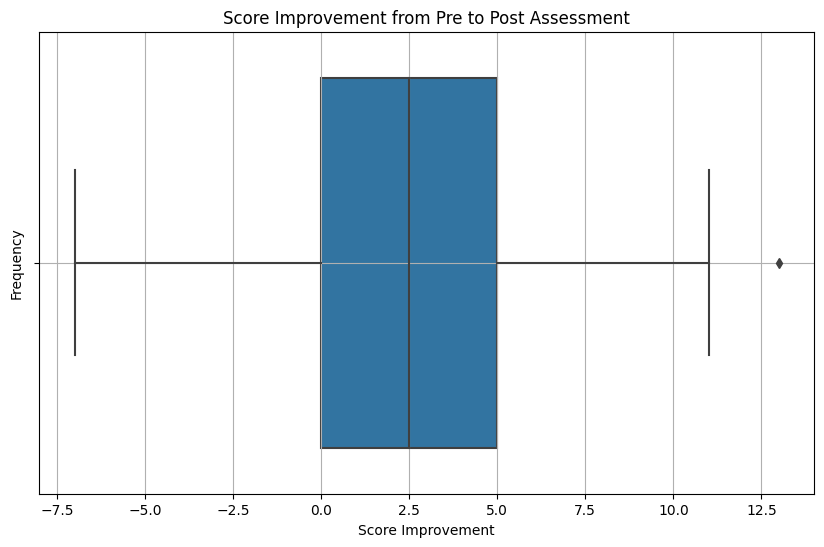

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting only the relevant columns for score improvement analysis
merged_scores = merged_on_ip[['SC0_pre', 'SC0_post']].dropna()

# Converting score columns to numeric for analysis
merged_scores['SC0_pre'] = pd.to_numeric(merged_scores['SC0_pre'], errors='coerce')
merged_scores['SC0_post'] = pd.to_numeric(merged_scores['SC0_post'], errors='coerce')

# Dropping NaN values in score columns (if any after conversion)
merged_scores = merged_scores.dropna()

# Calculating score improvement
merged_scores['score_improvement'] = merged_scores['SC0_post'] - merged_scores['SC0_pre']

# Plotting the Score Improvement
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_scores, x='score_improvement')
plt.title('Score Improvement from Pre to Post Assessment')
plt.xlabel('Score Improvement')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

/Users/ryansorkin/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ryansorkin/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


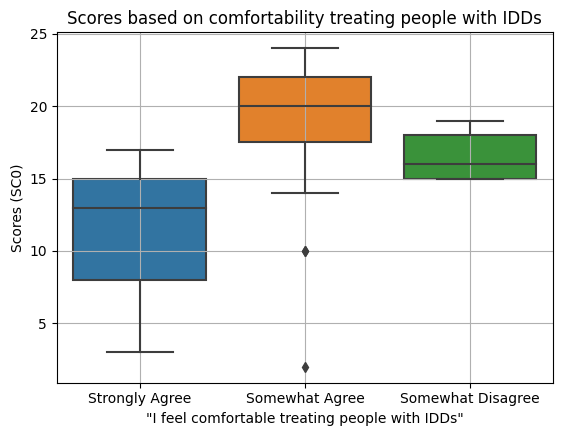

In [33]:
import pandas as pd
import statsmodels.api as sm

# Ensuring 'SC0' is numeric and 'Q49_4' is categorical
post_assessment_data['SC0'] = pd.to_numeric(post_assessment_data['SC0'], errors='coerce')
post_assessment_data = post_assessment_data.dropna(subset=['SC0', 'Q49_4'])

# Creating a box plot with 'SC0' on the y-axis and the different responses in 'Q49_4' on the x-axis
# plt.figure(figsize=(12, 8))
sns.boxplot(x='Q49_4', y='SC0', data=post_assessment_data)
plt.title('Scores based on comfortability treating people with IDDs')
plt.xlabel('"I feel comfortable treating people with IDDs"')
plt.ylabel('Scores (SC0)')
plt.subplots_adjust(bottom=0.15)
plt.xticks()
plt.grid(True)


plt.savefig('../output/ComfortWithIDDS.png')

/Users/ryansorkin/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ryansorkin/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


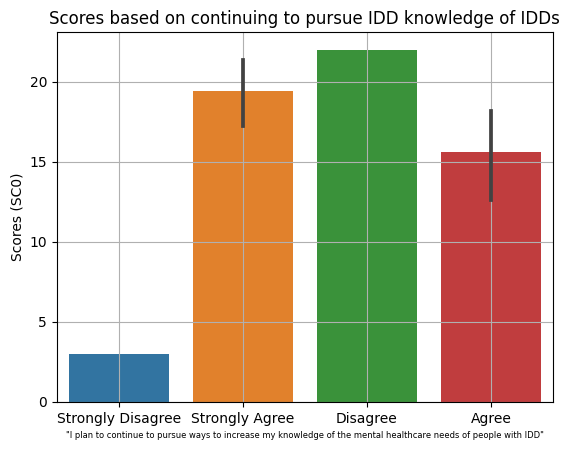

In [32]:
# Ensuring 'SC0' is numeric and 'Q49_4' is categorical
post_assessment_data['SC0'] = pd.to_numeric(post_assessment_data['SC0'], errors='coerce')
post_assessment_data = post_assessment_data.dropna(subset=['SC0', 'Q32_4'])

# Creating a box plot with 'SC0' on the y-axis and the different responses in 'Q49_4' on the x-axis
# plt.figure(figsize=(10, 6))
sns.barplot(x='Q32_4', y='SC0', data=post_assessment_data)
plt.title('Scores based on continuing to pursue IDD knowledge of IDDs')
plt.xlabel('"I plan to continue to pursue ways to increase my knowledge of the mental healthcare needs of people with IDD"', fontsize = 6)
plt.ylabel('Scores (SC0)')
plt.xticks()
plt.yticks()
# plt.subplots_adjust(bottom=0.15)
plt.grid(True)


plt.savefig('../output/IncreaseKnowledge.png')